In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import random

## Enclosing subgraph extraction

* we extract the surrounding subgraph around a link (2 vertices)  
* the size of $K$ vertices is user defined  
* for an edge $(x,y)$ we first add the ordered node list of $x$ and $y$ neighbors to $V_K$  
* then the next order neighbors until $|V_K| \ge K$  
* then crop or pad with zero the list to $K$  

In [5]:
g = nx.barabasi_albert_graph(10,5)

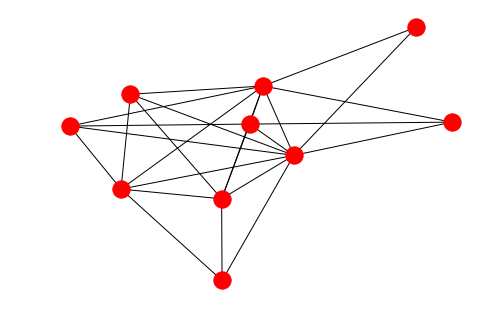

In [6]:
nx.draw(g)
plt.show()

In [7]:
e = list(g.edges())
e

[(0, 5),
 (0, 6),
 (1, 9),
 (1, 5),
 (1, 6),
 (2, 8),
 (2, 5),
 (2, 7),
 (3, 9),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 8),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (8, 9)]

In [8]:
ne = []
for _ in range(len(e)):
    ne.append((random.choice(list(g.nodes())), random.choice(list(g.nodes()))))

In [9]:
ne

[(6, 3),
 (7, 5),
 (8, 8),
 (4, 5),
 (3, 6),
 (4, 8),
 (1, 9),
 (3, 2),
 (7, 5),
 (3, 1),
 (7, 6),
 (4, 2),
 (3, 5),
 (7, 2),
 (8, 0),
 (5, 9),
 (7, 6),
 (5, 0),
 (6, 1),
 (9, 3),
 (9, 4),
 (8, 4),
 (3, 8),
 (7, 4),
 (2, 3)]

In [43]:
# select nodes
x,y = e[0]

In [44]:
e[0]

(0, 5)

In [45]:
# list of K nodes
Vk = [x,y]

In [46]:
Vk

[0, 5]

In [12]:
Vk.extend(list(nx.neighbors(g,x)))
Vk.extend(list(nx.neighbors(g,y)))

In [48]:
Vk.extend([i for i in nx.neighbors(g,x) if i not in Vk])

In [49]:
Vk.extend([i for i in nx.neighbors(g,y) if i not in Vk])

In [50]:
Vk

[0, 5, 6, 1, 2, 3, 4, 7, 8, 9]

In [14]:
k = 5
#crop
Vk_copped = Vk[:k]

In [15]:
Vk_copped

[0, 5, 5, 6, 0]

In [16]:
l = len(Vk)-k

In [17]:
l

8

In [20]:
Vk_padded = []
k = 10
# padding
if k > len(Vk):
    Vk_padded = Vk.copy()
    l = k-len(Vk)
#     print(l)
    dummies = ['D%02d' % i for i in range(l)]
       
    Vk_padded.extend(dummies)

In [21]:
Vk_padded

[]

In [55]:
def sub_graph(g,e,k=10):
    # select nodes
    x,y = e
    # list of K nodes
    Vk = [x,y]
    while len(Vk)<k:
        x_nbg = list(nx.neighbors(g,x))
        y_nbg = list(nx.neighbors(g,y))
        Vk.extend([i for i in x_nbg if i not in Vk])
        Vk.extend([i for i in y_nbg if i not in Vk])
    if k < len(Vk):
        Vk_cropped = Vk[:k]
        G = nx.Graph(nx.subgraph(g, Vk_cropped))
    return G

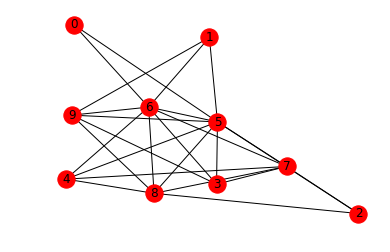

In [33]:
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos=pos)
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_labels(g, pos)
plt.axis('off')
plt.show()

In [52]:
e[0]

(0, 5)

In [56]:
g1 = sub_graph(g,e[0], k=6)

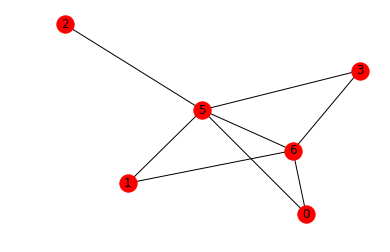

In [57]:
pos = nx.spring_layout(g1)
nx.draw_networkx_nodes(g1, pos=pos)
nx.draw_networkx_edges(g1,pos)
nx.draw_networkx_labels(g1, pos)
plt.axis('off')
plt.show()

In [58]:
e[1]

(0, 6)

In [59]:
g1 = sub_graph(g,e[1], k=6)

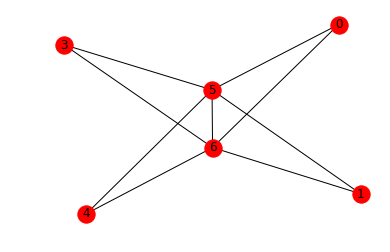

In [60]:
pos = nx.spring_layout(g1)
nx.draw_networkx_nodes(g1, pos=pos)
nx.draw_networkx_edges(g1,pos)
nx.draw_networkx_labels(g1, pos)
plt.axis('off')
plt.show()